In [1]:
import joblib
import pandas as pd
import numpy as np
import os
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

%matplotlib inline

import warnings
warnings.filterwarnings("ignore", category=FutureWarning)

from sklearn.exceptions import DataConversionWarning
warnings.filterwarnings(action='ignore', category=DataConversionWarning)

pd.options.display.max_rows = 1000
pd.options.display.max_columns = 50
pd.set_option('display.max_colwidth', 120)

In [2]:
from sklearn.utils.multiclass import unique_labels
def plot_confusion_matrix(y_true, y_pred, classes,
                          normalize=False,
                          title=None,
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    if not title:
        if normalize:
            title = 'Normalized confusion matrix'
        else:
            title = 'Confusion matrix, without normalization'

    # Compute confusion matrix
    cm = confusion_matrix(y_true, y_pred);
    # Only use the labels that appear in the data
    classes = classes[unique_labels(y_true, y_pred)]
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

        
    fig, ax = plt.subplots(1,1, figsize=(10,8))
    
    im = ax.imshow(cm, interpolation='nearest', cmap=cmap,vmin=0,vmax=1)
    
    cbar = fig.colorbar(im, ax=ax)
    cbar.ax.tick_params(labelsize=15) 
#     ax.figure.colorbar(im, ax=ax)
#     ax.tick_params(labelsize=10) 
    
    # We want to show all ticks...
    _ = ax.set_ylabel('True Label', fontsize=20)
    _ = ax.set_xlabel('Predicted Label', fontsize=20)
    _ = ax.set_xticklabels(classes,fontsize=20)
    _ = ax.set_yticklabels(classes,fontsize=20)
    _ = ax.set_title(title, fontsize=22)
    
    ax.set(xticks=np.arange(cm.shape[1]),
           yticks=np.arange(cm.shape[0]),
           # ... and label them with the respective list entries
           xticklabels=classes, yticklabels=classes)
#            title=title,
#            ylabel='True label',
#            xlabel='Predicted label')
     
    # Rotate the tick labels and set their alignment.
    plt.setp(ax.get_xticklabels(), rotation=45, ha="right",
             rotation_mode="anchor")
    
    # Loop over data dimensions and create text annotations.
    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i in range(cm.shape[0]):
        for j in range(cm.shape[1]):
            ax.text(j, i, format(cm[i, j], fmt),
                    ha="center", va="center",
                    color="white" if cm[i, j] > thresh else "black",fontsize=15)
    fig.tight_layout()
    
    #fig.savefig('./img.png',dpi = 300)   # save the figure to file
#     plt.close(fig)    # close the figure window
    
    return ax

In [3]:
def plot_freq(df, col, top_classes=20):
    """
    :param df: dataframe
    :param col: list of label string
    :param top_classes: (integer) Plot top labels only.
    """
    sns.set_style('whitegrid')

    col = col
    data = df[~df[col].isnull().any(axis=1)]
    data = data.set_index(col)
    
    # Check out the frequency over each concept.
    freq = pd.DataFrame({
            'freq': data.index.value_counts(normalize=True),
            'count': data.index.value_counts(normalize=False)},
            index=data.index.value_counts(normalize=True).index)
    print('Frequency(Top {})...'.format(top_classes))
    freq = freq[:top_classes]
    display(freq)
    
    # Plot bar chart.
    fig, ax = plt.subplots(1,1, figsize=(15,8))
    _ = freq.plot(y='freq', kind='bar', ax=ax, legend=False, colormap='Set2')
    _ = ax.set_ylabel('frequency', fontsize='x-large')
    _ = ax.set_xticklabels(freq.index.values, rotation=40, ha='right')
    _ = ax.set_title('Frequency over Each Class', fontsize='x-large')

# Table

In [4]:
columnToClassify = 'priority'

In [5]:
df_table_full = pd.read_csv("./resource/maint_order_process.csv",low_memory=False)

In [6]:
df_table_full.shape

(193005, 84)

In [7]:
df_table_full.groupby('priority').size().reset_index(name='count')

,priority,count
0,1,141982
1,2,19733
2,3,17652
3,4,9092
4,5,4546


In [8]:
df_plot = df_table_full.groupby(['priority']).size().reset_index(name='count').sort_values(by=['count'],ascending=False)

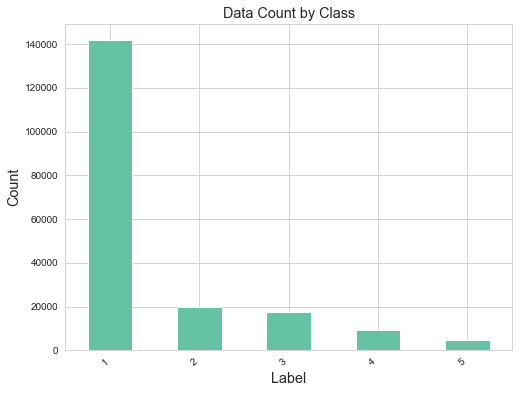

In [9]:
sns.set_style('whitegrid')
fig, ax = plt.subplots(1,1, figsize=(8,6))
_ = df_plot.plot(y='count', kind='bar', ax=ax, legend=False, colormap='Set2')
_ = ax.set_ylabel('Count', fontsize='x-large')
_ = ax.set_xlabel('Label', fontsize='x-large')
_ = ax.set_xticklabels(df_plot.priority.values, rotation=40, ha='right')
_ = ax.set_title('Data Count by Class', fontsize='x-large')

# TOPSIS Result

In [10]:
df_topsis = pd.read_csv('./resource/output_topsis.csv')

In [11]:
df_topsis = df_topsis[df_topsis.col!='priority']

In [12]:
df_topsis.shape

(83, 7)

In [13]:
df_topsis.head()

,col,typevalue,usenull,p_null,p_unique,p_max_row_class,rank_topsis
0,third_loc_id,1.0,1.0,0.033937,0.013533,0.031963,0.979647
1,second_loc_id,1.0,1.0,0.026155,0.003212,0.067071,0.966268
2,cost_center_id,1.0,1.0,0.025989,0.001264,0.068382,0.965746
3,asset_id,1.0,1.0,0.025901,0.051905,0.031693,0.959837
4,asset_group_id,1.0,1.0,0.025901,0.006580,0.089459,0.955425


In [14]:
list_exclude = ['cancel_user_id','origin_doc','prog_year_week_number','maint_order_cancel_reason_id',
                'total_cost','rpn','what','when','who','why','how','maint_order_on_hold_reason_id','performed_worktime',
                'estimated_worktime','performed_asset_downtime','id_mobile','mobile_uuid','rework_cos','index',
                'priority_calculated','maint_req_priority','maint_req_id',
                'user_text','scheduled_to_origin','est_finish_at','scheduled_to','est_finish_at_origin','logged_user_id']

df_exclude = df_table_full

for i in list_exclude:
    try:
        df_exclude = df_exclude.drop(i, axis=1)
    except:
        pass

In [15]:
df_topsis = df_topsis[df_topsis.col.isin(df_exclude.columns)]

In [16]:
df_topsis = df_topsis.reset_index().drop('index',axis=1)

In [17]:
# Select columns based in condition
df_select = df_topsis.query("p_null < 0.5 and p_unique < 0.5 and p_max_row_class < 0.8")

In [18]:
dict_cols = {
    "topsis5" : list(df_topsis[:5].col.values) ,
    "topsis10" : list(df_topsis[:10].col.values) ,
    "topsis15" : list(df_topsis[:15].col.values) ,
    "topsis20" : list(df_topsis[:20].col.values) ,
    "topsis25" : list(df_topsis[:25].col.values) ,
    "manualcols" : list(df_select.col.values)
}

# Normalize Field Priority

In [19]:
# Use Table Normalized or Table Raw
# df_table = pd.concat(list_df)
df_table = df_table_full

In [20]:
print('Field Labels ', df_table[columnToClassify].unique())
print('Table Thape ',df_table.shape)

Field Labels  [1 3 5 2 4]
Table Thape  (193005, 84)


# Func Process Dataframe

In [21]:
"""
Options 
------
topsis5 topsis10 topsis15 topsis20 topsis25 manualcols
"""
def process_df_ml(df_raw, columnToClassify, cols_list):
    
    df_table = df_raw[[columnToClassify,*cols_list]]

    previsores = df_table.drop(columnToClassify, axis=1)
    classe = df_table[[columnToClassify]]

    previsores_names = list(df_table.drop(columnToClassify, axis=1).columns)
    class_names = df_table[columnToClassify].unique().astype(str)

    _,cols = previsores.shape

    # Features Transform

    from sklearn.preprocessing import LabelEncoder

    labelencoder_previsores = LabelEncoder()
    for i in previsores.columns:
        previsores[i] = labelencoder_previsores.fit_transform(previsores[i])

    labelencoder_classe = LabelEncoder()
    classe[columnToClassify] = labelencoder_classe.fit_transform(classe[columnToClassify])

    # Split Dataset

    from sklearn.model_selection import train_test_split

    X_train, X_test, y_train, y_test = train_test_split(previsores, classe, test_size=0.30, random_state=0)

    # Smote

    from imblearn.under_sampling import NearMiss

    nr = NearMiss()
    X_train, y_train = nr.fit_sample(X_train, y_train)
    
    return X_train, X_test, y_train, y_test

# Test Varius Algorithms

In [22]:
#sklearn
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.metrics import mean_squared_error,confusion_matrix, precision_score, recall_score, auc,roc_curve
from sklearn import ensemble, linear_model, neighbors, svm, tree, neural_network
from sklearn.pipeline import make_pipeline
from sklearn.linear_model import Ridge
from sklearn.preprocessing import PolynomialFeatures
from sklearn import svm,model_selection, tree, linear_model, neighbors, naive_bayes, ensemble, discriminant_analysis, gaussian_process

#load package
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
#from math import sqrt
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

In [60]:
MLA = [
    #Ensemble Methods
#     ensemble.AdaBoostClassifier(),
#     ensemble.BaggingClassifier(),
#     ensemble.ExtraTreesClassifier(),
#     ensemble.GradientBoostingClassifier(),
    ensemble.RandomForestClassifier(),

    #Gaussian Processes
#     gaussian_process.GaussianProcessClassifier(),
    
    #GLM
    linear_model.LogisticRegressionCV(),
#     linear_model.PassiveAggressiveClassifier(),
#     linear_model. RidgeClassifierCV(),
#     linear_model.SGDClassifier(),
#     linear_model.Perceptron(),
    
    #Navies Bayes
#     naive_bayes.BernoulliNB(),
    naive_bayes.GaussianNB(),
    
    #Nearest Neighbor
    neighbors.KNeighborsClassifier(),
    
    #SVM
#     svm.SVC(probability=True),
#     svm.NuSVC(probability=True),
#     svm.LinearSVC(),
    
    #Trees    
    tree.DecisionTreeClassifier(),
   #tree.ExtraTreeClassifier(),
    
    ]

In [61]:
MLA_columns = []
MLA_compare = pd.DataFrame(columns = MLA_columns)


row_index = 0
for alg in MLA:
    print(alg.__class__.__name__)
    for key in dict_cols.keys():
#         print(key)
        
        X_train, X_test, y_train, y_test = process_df_ml(df_table, columnToClassify, dict_cols[key])
    
        predicted = alg.fit(X_train, y_train).predict(X_test)
        
        
        MLA_name = alg.__class__.__name__
        MLA_compare.loc[row_index, 'Data_Mode'] = key
        MLA_compare.loc[row_index, 'MLA_Name'] = MLA_name
        MLA_compare.loc[row_index, 'MLA_Train_Accuracy'] = round(alg.score(X_train, y_train), 4)
        MLA_compare.loc[row_index, 'MLA_Test_Accuracy'] = round(alg.score(X_test, y_test), 4)

        row_index+=1
    
MLA_compare.sort_values(by = ['MLA_Test_Accuracy'], ascending = False, inplace = True)    

RandomForestClassifier
LogisticRegressionCV
GaussianNB
KNeighborsClassifier
DecisionTreeClassifier


In [62]:
MLA_compare.head()

,Data_Mode,MLA_Name,MLA_Train_Accuracy,MLA_Test_Accuracy
4,topsis25,RandomForestClassifier,0.9872,0.5548
3,topsis20,RandomForestClassifier,0.9877,0.4906
2,topsis15,RandomForestClassifier,0.9866,0.4345
28,topsis25,DecisionTreeClassifier,1.0000,0.4233
27,topsis20,DecisionTreeClassifier,1.0000,0.4159


In [63]:
# pd.pivot_table(MLA_compare,index=["Data_Mode","MLA_Name"])

In [74]:
df2 = pd.pivot_table(MLA_compare, 
                        values=['MLA_Test_Accuracy','MLA_Train_Accuracy'],
                        index=['MLA_Name'],
                        columns=['Data_Mode'],
#                         aggfunc=np.sum,
                        fill_value=0).reset_index()


In [75]:
df2

MLA_Name MLA_Test_Accuracy                    \
Data_Mode                                manualcols topsis10 topsis15   
0          DecisionTreeClassifier            0.1095   0.2546   0.3513   
1                      GaussianNB            0.1188   0.3192   0.2925   
2            KNeighborsClassifier            0.1080   0.1311   0.2208   
3            LogisticRegressionCV            0.2461   0.1820   0.1677   
4          RandomForestClassifier            0.0939   0.2743   0.4345   

                                    MLA_Train_Accuracy                    \
Data_Mode topsis20 topsis25 topsis5         manualcols topsis10 topsis15   
0           0.4159   0.4233  0.1390             0.4897   1.0000   1.0000   
1           0.3236   0.3605  0.0892             0.2884   0.3603   0.3514   
2           0.2244   0.2307  0.1548             0.3822   0.7286   0.7332   
3           0.1495   0.1517  0.1516             0.3067   0.3485   0.4143   
4           0.4906   0.5548  0.0943             0.4884   0.9817   0.9866   

                                     
Data_Mode topsis20 topsis25 topsis5  
0           1.0000   1.0000  0.4011  
1           0.3781   0.3627  0.2806  
2           0.7365   0.7382  0.3246  
3           0.4058   0.4055  0.2909  
4           0.9877   0.9872  0.3997